In [1]:
import s2stools
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# open files

In [2]:
path = "../../data/s2s_ecmwf_uv_*" # CHANGE
ds = s2stools.process.open_files(path_pattern=path)

realtime path:  ../../data/s2s_ecmwf_uv_*_rt_cf.nc
cf	 
pf	 
chc	 
phc	 


In [3]:
print(ds)

<xarray.Dataset>
Dimensions:    (number: 4, longitude: 144, latitude: 73, leadtime: 2, reftime: 2, hc_year: 21)
Coordinates:
  * number     (number) int64 0 1 2 3
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * latitude   (latitude) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
  * leadtime   (leadtime) timedelta64[ns] 00:00:00 1 days
  * reftime    (reftime) datetime64[ns] 2020-11-16 2020-11-19
  * hc_year    (hc_year) int64 -20 -19 -18 -17 -16 -15 -14 ... -5 -4 -3 -2 -1 0
Data variables:
    u          (number, reftime, hc_year, leadtime, latitude, longitude) float32 dask.array<chunksize=(1, 1, 1, 2, 73, 144), meta=np.ndarray>
    v          (number, reftime, hc_year, leadtime, latitude, longitude) float32 dask.array<chunksize=(1, 1, 1, 2, 73, 144), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2022-01-13 17:49:25 GMT by grib_to_netcdf-2.24.0: grib_to_n...


# Basic Plotting

(optional) load theme: beach_towel

In [5]:
# not working at the moment
# s2stools.plot.themes.beach_towel()

select 60°N and compute zonal mean:

In [5]:
u60 = ds.u.sel(latitude=60).mean("longitude")
u60.leadtime.attrs["unit"] = "days" # optional
u60.attrs["unit"] = "m/s" # optional

spaghetti plot of a single forecast:

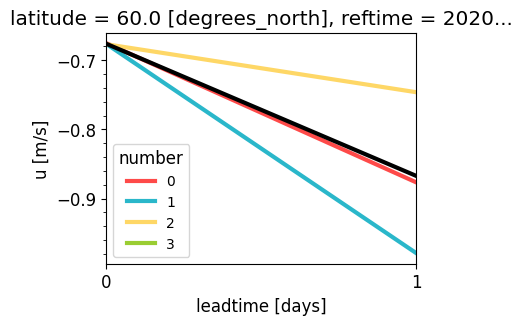

In [6]:
# ensemble mean
u60.isel(reftime=0, hc_year=0).mean("number").plot(c="black", zorder=10)
# individual ensemble members
u60.isel(reftime=0, hc_year=0).plot(hue="number")
# get axis
ax = plt.gca()
# (optional) format xaxis leadtime
s2stools.plot.xaxis_unit_days(ax, multiple=1)
plt.show()

# Deseasonalize

In [7]:
u60anom = s2stools.clim.deseasonalize(u60)

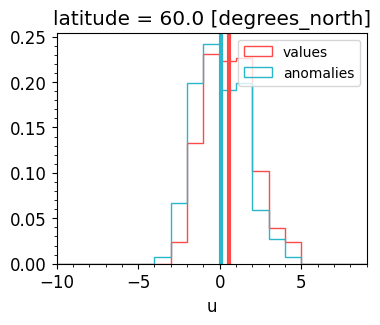

In [8]:
bins = np.arange(-10, 10)
# u60 distribution
u60.plot.hist(density=True, bins=bins, histtype="step", label="values")
plt.axvline(u60.mean(), c="C0")
# u60 anomalies distribution
u60anom.plot.hist(density=True, bins=bins, histtype="step", label="anomalies")
plt.axvline(u60anom.mean(), c="C1")
plt.legend()
plt.show()